In [1]:
'''
文档说明：利用keras快速创建一个识别手写数字图片的神经网络
'''
#加载mnist数据
from keras.datasets import mnist #keras中有很方便的包可以import mnist数据
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
print(train_images.shape)

(60000, 28, 28)


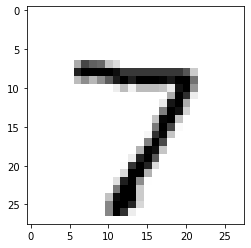

In [2]:
#从测试集中选取一张图并绘制
im = test_images[0]
import matplotlib.pyplot as plt
plt.imshow(im,cmap = plt.cm.binary)
plt.show()

In [4]:
print(test_labels.shape)


(10000,)


In [5]:
#构建一个能识别手写数字图片的神经网络
from keras import models,layers
network = models.Sequential()

In [6]:
#增加含有512个神经元的hidden层
network.add(layers.Dense(512, activation = "relu", input_shape=(28*28, )))#hidden层使用relu作为激活函数，input层有28*28个units

In [7]:
#增加一个10个神经元的Output层
network.add(layers.Dense(10,activation = "sigmoid"))

In [8]:
#编译训练模型
network.compile(optimizer = 'rmsprop',#优化器
                loss = 'categorical_crossentropy',#loss计算
                metrics = ['accuracy'])#评估标准

In [9]:
#将image数据像素点的值转换到[0,1]之间
train_images = train_images.reshape((60000,28*28))#将50000个28*28的二维数组转换为50000个维度784一维数组
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255


In [10]:
#label由[0,9]的数字转换为10维度的一维数组,例如7转换为[0,0,0,0,0,0,0,1,0,0,]
from keras.utils import to_categorical
print("Before changing:",test_labels[0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print("After changing:",test_labels[0])

Before changing: 7
After changing: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [11]:
print(test_labels.shape)

(10000, 10)


In [12]:
import numpy as np
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

print(train_images.shape,train_labels.shape,test_images.shape,test_labels.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [13]:
#输入数据
network.fit(train_images, 
            train_labels, 
            epochs = 30, #表示对输入的所有数据循环训练5次
            batch_size = 128) #网络一次读取128张图片进行训练

Epoch 1/30
469/469 [==============================] - 6s 13ms/step - loss: 0.2843 - accuracy: 0.9181
Epoch 2/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1181 - accuracy: 0.9650
Epoch 3/30
469/469 [==============================] - 6s 14ms/step - loss: 0.0773 - accuracy: 0.9765
Epoch 4/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0571 - accuracy: 0.9825
Epoch 5/30
469/469 [==============================] - 7s 14ms/step - loss: 0.0433 - accuracy: 0.9870
Epoch 6/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0327 - accuracy: 0.9900
Epoch 7/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0259 - accuracy: 0.9922
Epoch 8/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0199 - accuracy: 0.9940
Epoch 9/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0161 - accuracy: 0.9952
Epoch 10/30
469/469 [==============================] - 8s 16ms/step - loss: 0.0119 - accura

In [14]:
#让训练后的网络对test集合进行预测
test_loss,test_acc = network.evaluate(test_images,test_labels,verbose = 1)
print('test_acc:',test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.1141 - accuracy: 0.9822
test_acc: 0.982200026512146


In [15]:
#抽取一张图片，让网络判断
print(train_images.shape,train_labels.shape,test_images.shape,test_labels.shape)
print(test_labels[0])


(60000, 784) (60000, 10) (10000, 784) (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [16]:
res = network.predict(test_images)

In [17]:
for i in range(10000):
    print("real: ",test_labels[i].argmax()," pred: ",res[i].argmax())  

4  pred:  4
real:  5  pred:  5
real:  9  pred:  9
real:  2  pred:  2
real:  0  pred:  0
real:  3  pred:  3
real:  9  pred:  9
real:  4  pred:  4
real:  9  pred:  9
real:  7  pred:  7
real:  3  pred:  3
real:  8  pred:  8
real:  7  pred:  7
real:  4  pred:  4
real:  4  pred:  4
real:  9  pred:  9
real:  8  pred:  8
real:  5  pred:  5
real:  8  pred:  8
real:  2  pred:  2
real:  6  pred:  6
real:  6  pred:  6
real:  2  pred:  2
real:  3  pred:  3
real:  1  pred:  1
real:  3  pred:  3
real:  2  pred:  2
real:  7  pred:  7
real:  3  pred:  3
real:  1  pred:  1
real:  9  pred:  9
real:  0  pred:  0
real:  1  pred:  1
real:  1  pred:  1
real:  3  pred:  3
real:  5  pred:  5
real:  0  pred:  0
real:  7  pred:  7
real:  8  pred:  8
real:  1  pred:  1
real:  5  pred:  5
real:  1  pred:  1
real:  4  pred:  4
real:  6  pred:  6
real:  0  pred:  0
real:  0  pred:  0
real:  4  pred:  4
real:  9  pred:  9
real:  1  pred:  1
real:  6  pred:  6
real:  6  pred:  6
real:  9  pred:  9
real:  0  pred:  0


In [ ]:
import 